<a href="https://colab.research.google.com/github/RDifault/Computer-Vision/blob/main/CV_Canny_Edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

Membaca image yang akan digunakan

In [ ]:
img = cv2.imread('mclaren2.jpg')

Mengubah image menjadi Grayscale

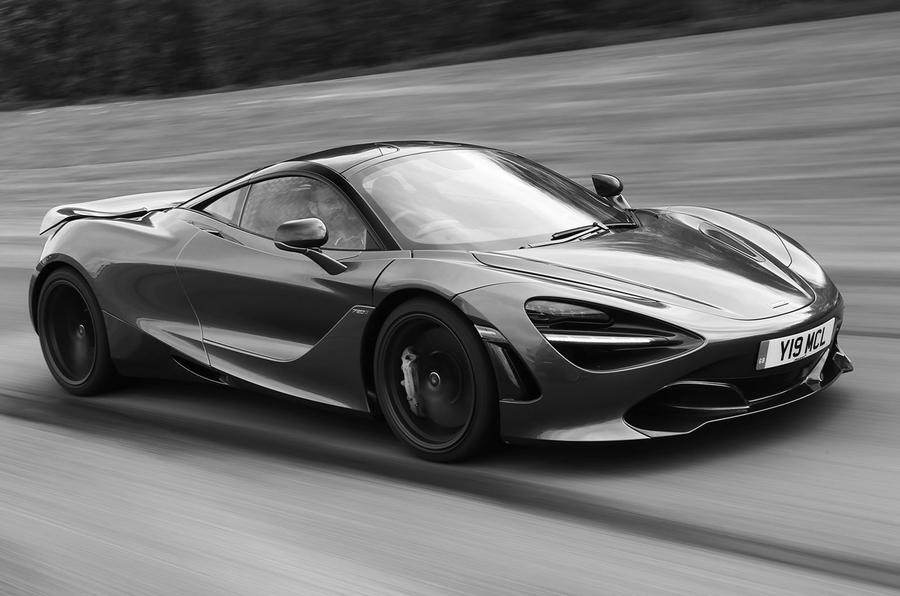

In [ ]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

#Noise Reduction

Noise reduction dibutuhkan agar edge detector tidak terpengaruh dengan noise yang ada pada image. Maka dari itu, untuk menghilangkan noise, saya akan menggunakan Gaussian Blur dari library OpenCV

In [ ]:
blur = cv2.GaussianBlur(gray_img, (7, 7), 5)

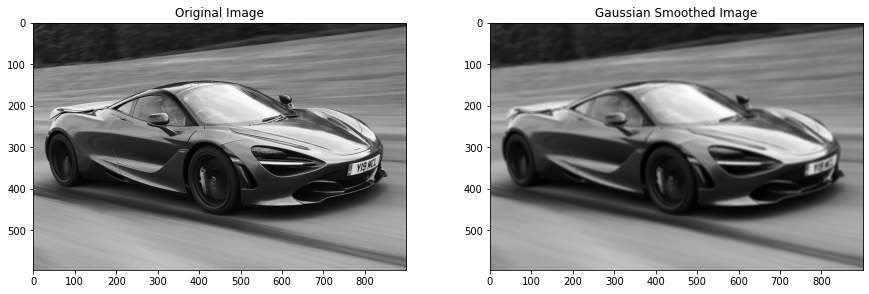

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.title("Original Image")
plt.imshow(gray_img, cmap = 'gray')

plt.subplot(2,2,2)
plt.title("Gaussian Smoothed Image")
plt.imshow(blur, cmap = 'gray')


#Gradient Calculation

Mengkalkulasi gradien dari gambar dengan menggunakan operator edge detection untuk mendapatkan arah dan intensitas edge. Saya akan menggunakan Sobel filter untuk mendapatkan arah dan intensitas edge.

In [ ]:
gx = cv2.Sobel(blur, cv2.CV_64F, 1, 0)
gy = cv2.Sobel(blur, cv2.CV_64F, 0, 1)

Setelah mengaplikasikan Sobel filter, selanjutnya mengkalkulasi magnitude dan sudut dari gradien

In [ ]:
gradient_mag = np.sqrt(gx ** 2 + gy ** 2)
gradient_mag *= 255 / gradient_mag.max()

In [ ]:
theta = np.arctan2(gy, gx)

Menampilkan side by side gradient smoothed image dengan gradient calculated

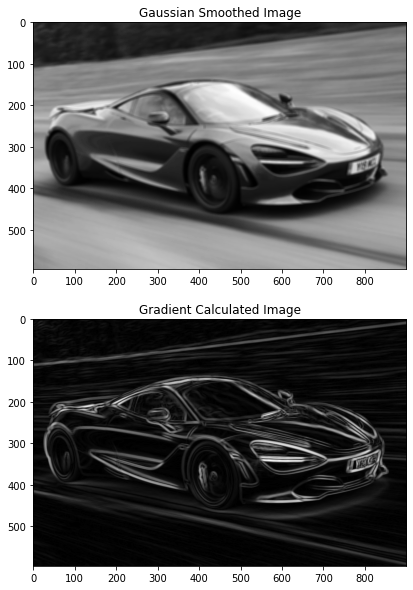

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.title("Gaussian Smoothed Image")
plt.imshow(blur, cmap = 'gray')

plt.subplot(2,2,3)
plt.title("Gradient Calculated Image")
plt.imshow(gradient_mag, cmap = 'gray')

#Non-Max Suppression

Tahap ini berfungsi untuk menghilangkan garis-garis atau edge yang tebal agar gambar final memiliki edge yang tipis

In [ ]:
def non_maximum_suppression(img, angle):
    size = img.shape
    output = np.zeros(size)

    for i in range(1, size[0] - 1):
        for j in range(1, size[1] - 1):
            if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                value_to_compare = max(img[i, j - 1], img[i, j + 1])
            elif (22.5 <= angle[i, j] < 67.5):
                value_to_compare = max(img[i - 1, j - 1], img[i + 1, j + 1])
            elif (67.5 <= angle[i, j] < 112.5):
                value_to_compare = max(img[i - 1, j], img[i + 1, j])
            else:
                value_to_compare = max(img[i + 1, j - 1], img[i - 1, j + 1])

            if img[i, j] >= value_to_compare:
                output[i, j] = img[i, j]
    output = np.multiply(output, 255.0 / output.max())

    return output

In [ ]:
suppressed_img = non_maximum_suppression(gradient_mag, theta)

Menampilkan side-by-side gambar gradient calculated dengan non-max suppression applied

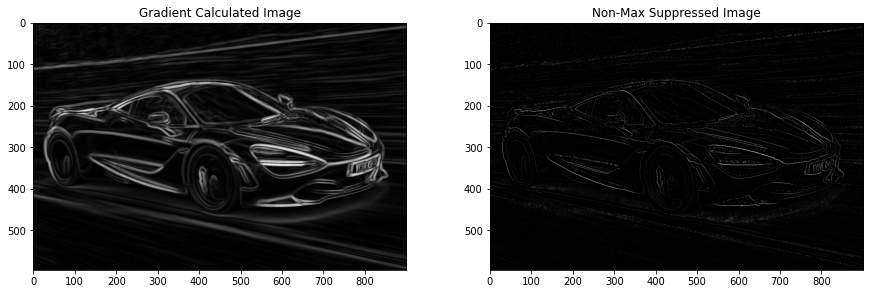

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.title("Gradient Calculated Image")
plt.imshow(gradient_mag, cmap = 'gray')

plt.subplot(2,2, 2)
plt.title("Non-Max Suppressed Image")
plt.imshow(suppressed_img, cmap = 'gray')

#Double Thresholding

Berfungsi untuk mengidentifikasi pixel yang strong (dideteksi oleh high threshold), weak (dideteksi oleh low threshold), dan non-relevant (terdeteksi oleh kedua threshold)

In [ ]:
def threshold(image, low, high):
    result = np.zeros(image.shape)

    strong = 255
    weak = 45

    strong_width, strong_height = np.where(image >= high)
    weak_width, weak_height = np.where((image <= high) & (image >= low))

    result[strong_width, strong_height] = strong
    result[weak_width, weak_height] = weak

    return result

In [ ]:
double_thres = threshold(suppressed_img, 15, 35)

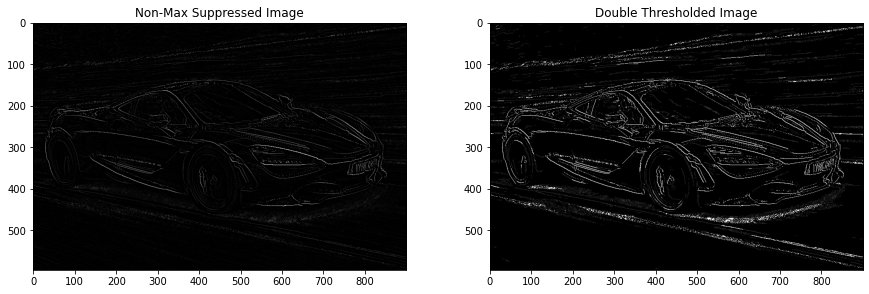

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.title("Non-Max Suppressed Image")
plt.imshow(suppressed_img, cmap = 'gray')

plt.subplot(2,2,2)
plt.title("Double Thresholded Image")
plt.imshow(double_thres, cmap = 'gray')

#Edge Tracking by Hytheresis

Setelah double thresholding, selanjutnya mengubah edges yang weak menjadi strong. Dengan Hytheresis, weak edge yang tidak terhubung dengan strong edge akan dijadikan strong edge. Sedangkan weak edge yang tidak terhubung dengan strong edge akan dihapus

In [ ]:
def hysteresis (img) :
  width, height = img.shape

  for i in range(1, width-1):
    for j in range(1, height-1):
        if (img[i,j] == 45):
            if 255 in [img[i+1, j-1],img[i+1, j],img[i+1, j+1],img[i, j-1],img[i, j+1],img[i-1, j-1],img[i-1, j],img[i-1, j+1]]:
                img[i, j] = 255
            else:
                img[i, j] = 0

  return img

In [ ]:
hyst_img = hysteresis(double_thres)

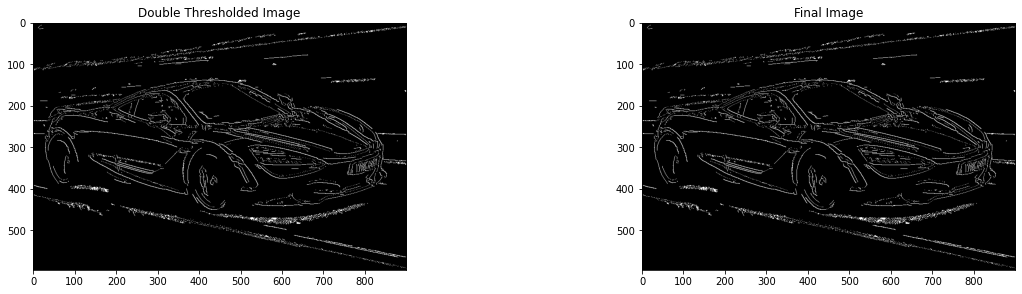

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.title("Double Thresholded Image")
plt.imshow(double_thres, cmap = 'gray')

plt.subplot(2,2,2)
plt.title("Final Image")
plt.imshow(hyst_img, cmap = 'gray')